# Disable Warnings and setup autoreload.

In [71]:
%load_ext autoreload
%autoreload 2

!export TF_CPP_MIN_LOG_LEVEL=3
!export XLA_FLAGS=--xla_gpu_cuda_data_dir=/dev/null
!export TF_XLA_FLAGS="--tf_xla_enable_xla_devices=false"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [2]:
import warnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings("always")

# Load Raw Labels and Preds

Returns as ```labels``` and ```preds```.

In [3]:
import pandas as pd 

# fn="NHA_civil_model_outputs_extract2.csv"
fn = "NHA_civil_recursive_generation_results2.csv"

df=pd.read_csv(fn)
preds=df["Scopes"].tolist()
pred_pages=df["Page"].tolist()

from datasets import load_dataset 

civil_scope_breakout_dict=load_dataset("genesis1SubHub/NHA-Civil-Scope-breakout")
civil_plans_dict=load_dataset("genesis1SubHub/NHA-Civil-set")

civil_scope_breakout=civil_scope_breakout_dict["train"]
civil_plans=civil_plans_dict["train"]

labels=civil_scope_breakout["scope"]
label_pages=civil_scope_breakout["page_ids"]

print(f"Num Preds: {len(preds)}")
print(f"Num labels: {len(labels)}")

README.md:   0%|          | 0.00/385 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/93 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/354 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/96.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/27 [00:00<?, ? examples/s]

Num Preds: 366
Num labels: 93


# Evaluate

In [4]:
from src.pipeline import PipelineOrchestrator
from src.system_prompts import (
    merge_system_prompt_new,
    phrase_normalize_system_prompt,
    gray_area_analysis_system_prompt,
)

from openai import OpenAI

ground_truth_model="gpt-4o-2024-08-06"
client = OpenAI(api_key="[REMOVED_SECRET]")

kwargs = {
    "display_pbar":True,
    "print_log":False,
    "n_clusters":None,
    "client":client,

    "norm.temperature":0.25,
    "norm.system_prompt":phrase_normalize_system_prompt,

    "group.threshold":0.1,
    "group.cluster.linkage":"average",
    "group.cluster.affinity":"precomputed",

    "merge.model_name": ground_truth_model,
    "merge.temperature": 0.25,
    "merge.system_prompt": merge_system_prompt_new,

    "compare.threshold":0.16,
    "compare.scs_alpha":0.70,
    "compare.cluster.linkage":"average",
    "compare.cluster.affinity":None,
    
    "gray.model_name":ground_truth_model,
    "gray.temperature" : 0.25,
    "gray.hybrid_dist_alpha":0.40,
    "gray.system_prompt":gray_area_analysis_system_prompt,
}

pipeline_orchestrator=PipelineOrchestrator(
    device="cuda:0",
    env=globals(),
    **kwargs
)

/usr/lib/python3/dist-packages/sklearn/utils/multiclass.py:13: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
2025-05-12 20:12:26.681596: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747080746.703980    2479 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747080746.714186    2479 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747080746.732826    2479 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747080746.732847   

No instance of embed model found, building from source.


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.48G [00:00<?, ?B/s]

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x7204363264a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436326bc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436326b00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436326b00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436326b00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436326b00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436326b00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436326b00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436326b00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436326e00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436326e00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436326e00>
sys:1: ResourceWarning: uncl

tokenizer_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436295fc0>


tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436296da0>


config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436297e80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436296020>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436297820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436297ca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x720436297e20>


In [5]:
# Disable printing system prompts in the __str__ method
print(pipeline_orchestrator.experiement_config)

Experiment Config Schema:

  NORM config:
    client: <openai.OpenAI object at 0x72079a41fb20>
    model_name: gpt-4o-2024-08-06
    temperature: 0.25
    print_log: False
    display_pbar: True

  EMBED config:
    model_name: sentence-t5-xl

  GROUP config:
    threshold: 0.1
    n_clusters: None
    cluster: ClusterConfig(linkage='average', affinity='precomputed')

  MERGE config:
    client: <openai.OpenAI object at 0x72079a41fb20>
    model_name: gpt-4o-2024-08-06
    temperature: 0.25
    display_pbar: True

  COMPARE config:
    threshold: 0.16
    n_clusters: None
    scs_alpha: 0.7
    cluster: ClusterConfig(linkage='average', affinity=None)

  GRAY config:
    client: <openai.OpenAI object at 0x72079a41fb20>
    model_name: gpt-4o-2024-08-06
    temperature: 0.25
    hybrid_dist_alpha: 0.4



In [6]:
pipeline_orchestrator.setup_corpus(
    preds=preds,
    pred_pages=pred_pages,
    labels=labels,
    label_pages=label_pages,
)

Phrases Processed: 93/93: 100%|██████████| 93/93 [01:14<00:00,  1.24it/s]


In [81]:
hard_scs_metrics , soft_scs_metrics, doc_results, merge_output = pipeline_orchestrator.eval(
    plans=civil_plans,
    scope_breakout=civil_scope_breakout,
)

Dist-matrix shape: (366, 366)

Clusters Breakdown:
  Node Count 1 : Cluster Count 202
  Node Count 2 : Cluster Count 33
  Node Count 3 : Cluster Count 10
  Node Count 4 : Cluster Count 4
  Node Count 5 : Cluster Count 3
  Node Count 6 : Cluster Count 2
  Node Count 7 : Cluster Count 1
  Node Count 8 : Cluster Count 1
  Node Count 10 : Cluster Count 1

Cluster Schema:
  Nonsingleton Cluster Count: 55
  Singleton Cluster Count: 202
  Total Clusters: 257

Num preds | Total Nodes: 366
Cluster Avg Dist Schema
  Num Nodes: 2 Avg Dist: 0.0517 Dist Stdev: 0.0334
  Num Nodes: 3 Avg Dist: 0.0505 Dist Stdev: 0.0361
  Num Nodes: 4 Avg Dist: 0.0500 Dist Stdev: 0.0366
  Num Nodes: 5 Avg Dist: 0.0530 Dist Stdev: 0.0321
  Num Nodes: 6 Avg Dist: 0.0528 Dist Stdev: 0.0253
  Num Nodes: 7 Avg Dist: 0.0507 Dist Stdev: 0.0299
  Num Nodes: 8 Avg Dist: 0.0626 Dist Stdev: 0.0318
  Num Nodes: 10 Avg Dist: 0.0401 Dist Stdev: 0.0337

All clusters have intra distance less than 0.1


Clusters Processed: 257/257: 100%|██████████| 257/257 [00:46<00:00,  5.47it/s]


Combined Pred Schema Before & After
  Before: 3 Lenth of Combined Pred: 1 Count: 9
  Before: 4 Lenth of Combined Pred: 1 Count: 4
  Before: 8 Lenth of Combined Pred: 1 Count: 1
  Before: 6 Lenth of Combined Pred: 1 Count: 1
  Before: 2 Lenth of Combined Pred: 1 Count: 32
  Before: 5 Lenth of Combined Pred: 1 Count: 3
  Before: 3 Lenth of Combined Pred: 2 Count: 1
  Before: 10 Lenth of Combined Pred: 1 Count: 1
  Before: 6 Lenth of Combined Pred: 3 Count: 1
  Before: 2 Lenth of Combined Pred: 2 Count: 1
  Before: 7 Lenth of Combined Pred: 1 Count: 1

Combined Pred Schema
  Lenth of Combined Pred: 1 Count: 52
  Lenth of Combined Pred: 2 Count: 2
  Lenth of Combined Pred: 3 Count: 1

Singleton Pred Groups Count: 202

Results given threshold: 0.1600
  Used Preds | Precision: 83/261 - 31.8008%
  Used Labels | Recall: 51/93 - 54.8387%


Cluster Objs Processed: 76/76: 100%|██████████| 76/76 [01:48<00:00,  1.43s/it]


Hard pred count: 83/261 - 31.8008%
Gray Area count: 178/261 - 68.1992%
Used Label count: 51/93 - 54.8387%

Gray Area Breakdown:
  Irrelevant : 144 - 80.8989%
  Subscope : 33 - 18.5393%
  Match : 1 - 0.5618%
No Matches Schema
  Total No Matches: 144
  in_singleton: 18
  in_merged: 126

Matches Schema
  Total Matches: 84
  in_singleton: 32
  in_merged: 52

Gray Matches Schema
  Total Matches: 33
  in_singleton: 9
  in_merged: 24

Match Page Accuracy:
  Precision: 43.32/277 - 15.64%
  Recall:  72.48/159 - 45.59%
  Jaccard: 40.16/349 - 11.51%

No Match Page Accuracy:
  Precision: 0.00/149
  Recall:  0.00/0
  Jaccard: 0.00/149




In [82]:
print(soft_scs_metrics)
print("\n")
print(hard_scs_metrics)

Recall: 62.82/93 = 67.55%
Precision: 94.82/261 = 36.33%
SCSₐ=0.70: 28.18%


Recall: 51.00/93 = 54.84%
Precision: 83.00/261 = 31.80%
SCSₐ=0.70: 17.93%


In [85]:
# Doc Accuracy
#   avg_jaccard : 7.3484%
#   avg_recall : 21.9597%
#   avg_precision : 13.4827%
#   doc_score : 17.7212%
print(f"Doc Accuracy")
for k,v in doc_results.stats.compute_document_metrics(doc_alpha=0.5).items():
    print(f"  {k} : {v*100:0.4f}%")

Doc Accuracy
  avg_jaccard : 8.0639%
  avg_recall : 45.5870%
  avg_precision : 10.1682%
  doc_score : 27.8776%


# Plot Results

In [10]:
from src.evaluate import DocPlotter 

plotter=DocPlotter(
    match_page_metrics=doc_results.combined_page_metrics
)

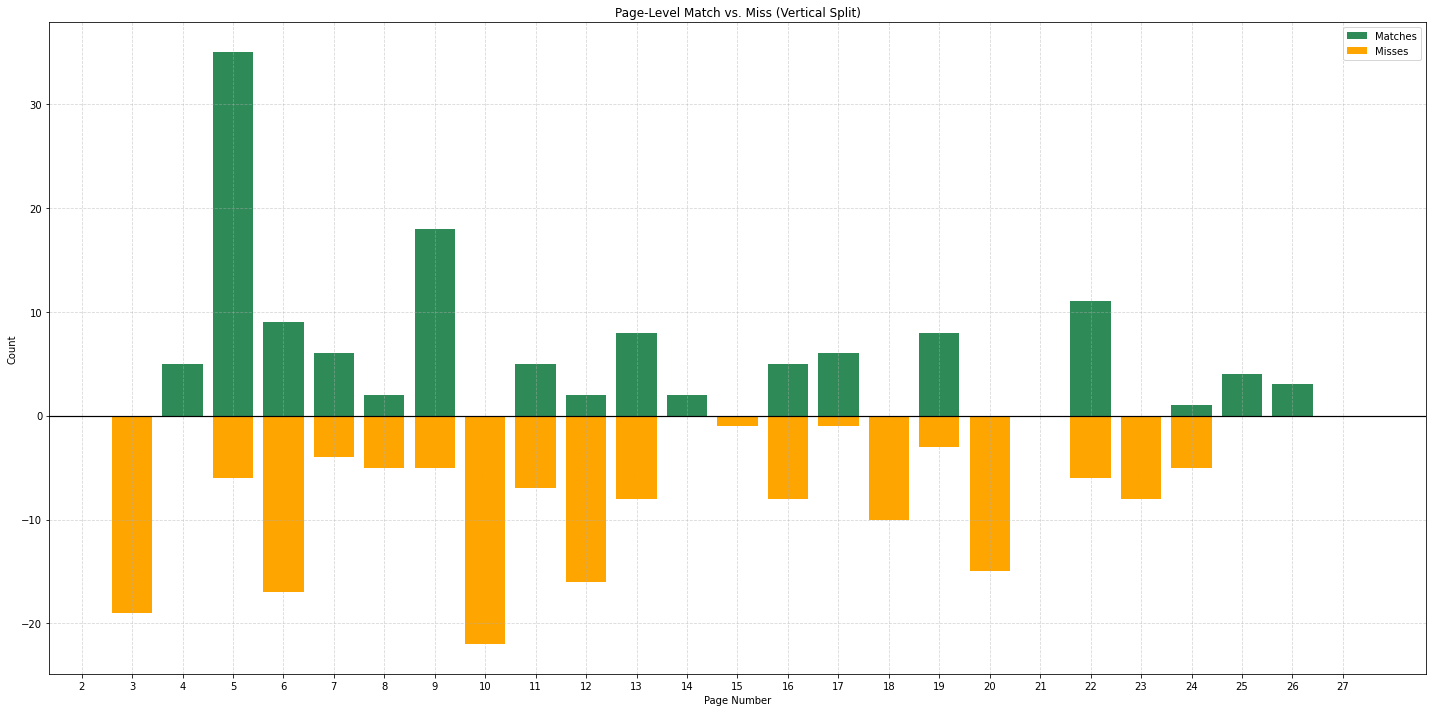

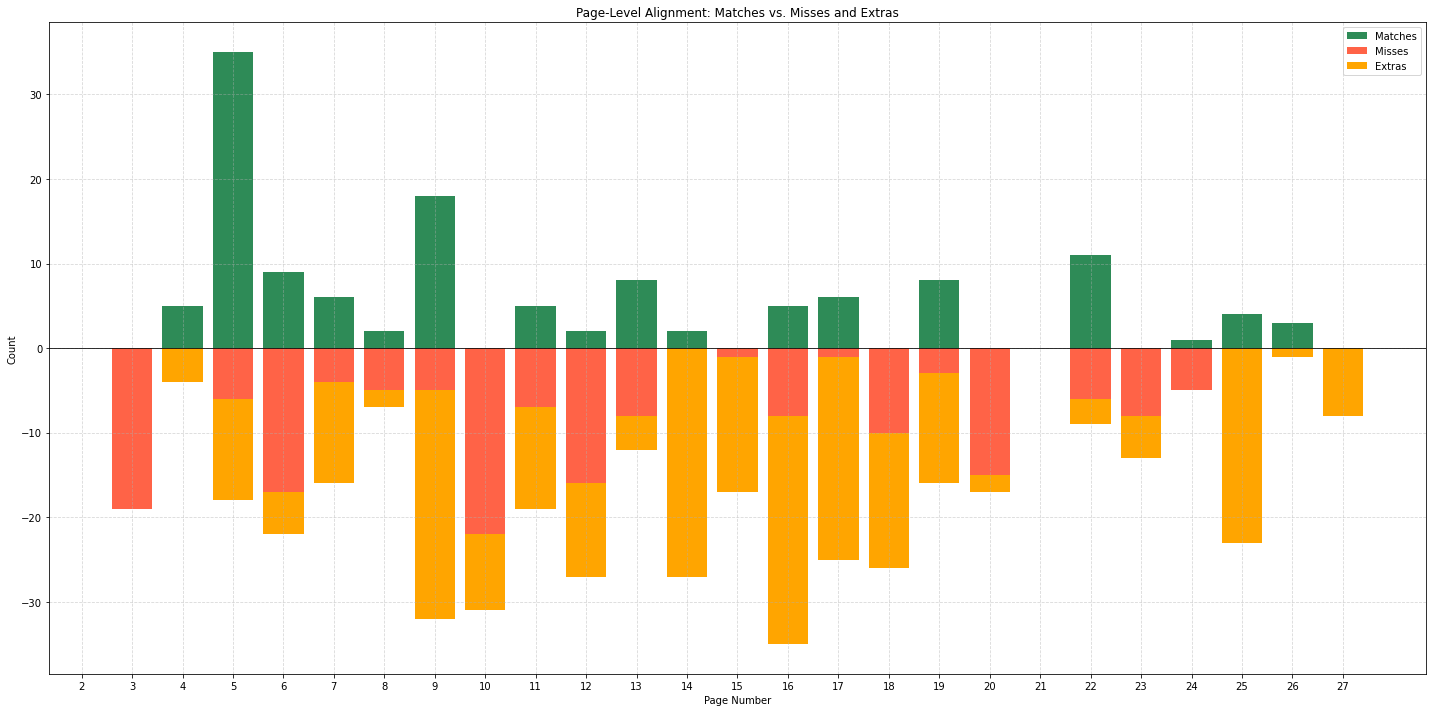

In [11]:
fig_match_and_misses=plotter.plot_match_and_misses()
fig_all=plotter.plot_all()

# Visualize Used, Unused, Soft-Used Labels

In [30]:
used_labels = [
    i.label for i in pipeline_orchestrator.alignment_evaluator.cluster_objs
]
unused_count=0
for label  in pipeline_orchestrator.corpus.norm_labels:
    if label not in used_labels:
        print(label)
        unused_count+=1
unused_count

provide and install city sidewalk tie-ins
provide and install one pedestrian ramp
provide and install one cdot parallel curb ramp
provide and install all fence metal gates
provide and install panic devices to all fence gates
provide and install accessible parking r7-8 and r7-8b signs
provide and install aggregate base course to a depth of 8.5-inch at asphalt parking lot
trenching for stormwater underdrain within building
backfill domestic water trench once inspected
provide and install two 6-inch sanitary service connections, one for future use
city and water district tap fees for sewer and water
provide and install one sanitary stub for future tie-in
assuming utilities have been coordinated with the other disciplines
assume all utility mains are adequately located and sized
provide and install additional inlet protection
remove one rocksock
remove vehicle tracking control, staging, and concrete washout area


17

In [43]:
# Seperate labels in soft and hard matches
from collections import defaultdict

results=defaultdict(list)
for cluster_objs in pipeline_orchestrator.alignment_evaluator.cluster_objs:
    used_label_hard=False
    used_label_soft=False
    for pred_group in cluster_objs.preds:
        if pred_group.dist_score <= pipeline_orchestrator.experiement_config.compare.threshold:
            used_label_hard=True
            break
        else:
            used_label_soft=True
    
    if used_label_hard and not used_label_soft:
        results["hard"].append(cluster_objs)
    elif used_label_hard and used_label_soft:
        results["hard"].append(cluster_objs)
    elif not used_label_hard and used_label_soft:
        results["soft"].append(cluster_objs)
    else:
        results["soft"].append(cluster_objs)
        

In [44]:
for k,v in results.items():
    print(f"\n{k}")
    for a in v:
        print(f"  {a.label}")


hard
  provide and install building concrete patio
  trenching for sewer lines
  provide and install new sanitary manhole cover on sewer line
  provide and install storm manhole and catch basin
  provide and install concrete retaining wall around building lot
  provide and install asphalt parking lot
  tie in existing concrete pan saw cut 2-foot opening in curb to accommodate pan
  provide and install benches and tables
  provide and install sidewalk chase drain
  provide and install one cdot type 2 directional ramp
  provide and install 6-foot decorative metal fence
  provide and install expansion joint between curb and city sidewalk
  provide and install 5-foot cdot inlet type r
  provide and install outlet structure to be retrofitted with orifice plate and trash screen
  provide and install cdot perpendicular vertical pedestrian directional parallel curb ramps
  provide and install parking lot striping
  provide and install 3 water service lines for domestic water, fire sprinklers,